In [1]:
import pandas as pd
import numpy as np


y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
df.to_excel("qa_testing.xlsx", index=False)

# Start Working here

In [3]:
data = pd.read_excel("qa_testing.xlsx")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_true  10 non-null     int64
 1   y_pred  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


,y_true,y_pred
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0


# Matrices


In [4]:
from sklearn.metrics import accuracy_score, \
precision_score, recall_score, f1_score, \
confusion_matrix, roc_auc_score, roc_curve

In [8]:
y_true = data['y_true'].values
y_pred = data['y_pred'].values

print(y_true)
print(y_pred)

[1 0 1 1 0 1 0 0 1 0]
[1 0 1 0 0 1 1 0 1 0]


In [7]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [9]:
# Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.80


In [10]:
# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.80


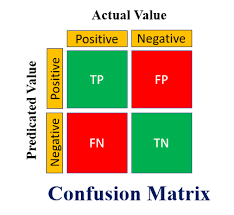

In [11]:
# prompt: create auc cure on y_true and y_predict

# F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{cm}")

# ROC AUC Score
auc = roc_auc_score(y_true, y_pred)
print(f"AUC: {auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"Thresholds: {thresholds}")


F1-Score: 0.80
Confusion Matrix:
[[4 1]
 [1 4]]
AUC: 0.80
FPR: [0.  0.2 1. ]
TPR: [0.  0.8 1. ]
Thresholds: [inf  1.  0.]


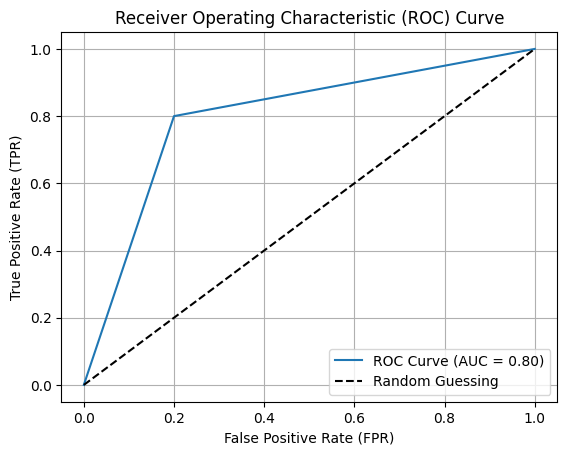

In [12]:
# prompt: visualize roc curve

import matplotlib.pyplot as plt

# ROC Curve visualization
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# prompt: visualize auc curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are already defined from your previous code
# Example:
# y_true = data['y_true'].values
# y_pred = data['y_pred'].values


# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8748 - loss: 0.4435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9636 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0811
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9822 - loss: 0.0586
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0434
313/313 - 1s - 3ms/step - accuracy: 0.9782 - loss: 0.0730

Test accuracy: 0.9782000184059143
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Confusion Matrix:
[[ 968    0    2    1    1    0    4    1    2    1]
 [   0 1129    1    1    0    1    1    0    2    0]
 [   3    4 1007    2    3    0    2    7    4    0]
 [   1    1    5  983    0    4    0    5    3    8]
 [   1    0    2    1  955    0    4    5    0   14]
 [   2    2    0    5    0  874    2    0    3    4]
 [   5    3    0    0    4    8  934    1    3    

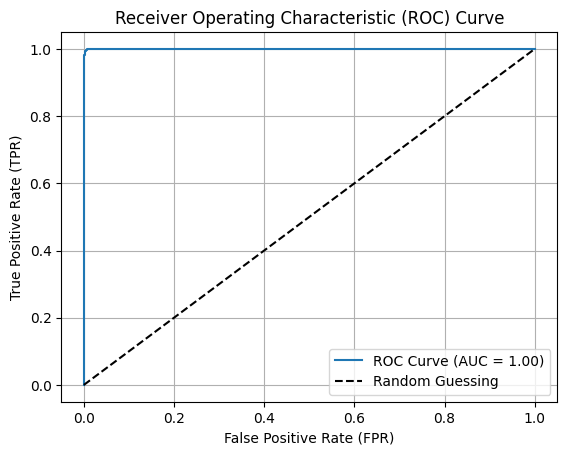

In [13]:
# prompt: generate minist classfication deep learning code then create precesion, recall, and f1-score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5) # Reduced epochs for faster execution

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


#ROC AUC and Curve (for binary classification, adapt for multi-class)
# Example: Consider class '0' vs. rest
y_test_binary = (y_test == 0).astype(int)
y_pred_prob_binary = y_pred_prob[:, 0]  # Probabilities for class 0

auc = roc_auc_score(y_test_binary, y_pred_prob_binary)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob_binary)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - accuracy: 0.8994 - loss: 0.3231 - val_accuracy: 0.9844 - val_loss: 0.0444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9876 - val_loss: 0.0397
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9923 - val_loss: 0.0267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9910 - val_loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


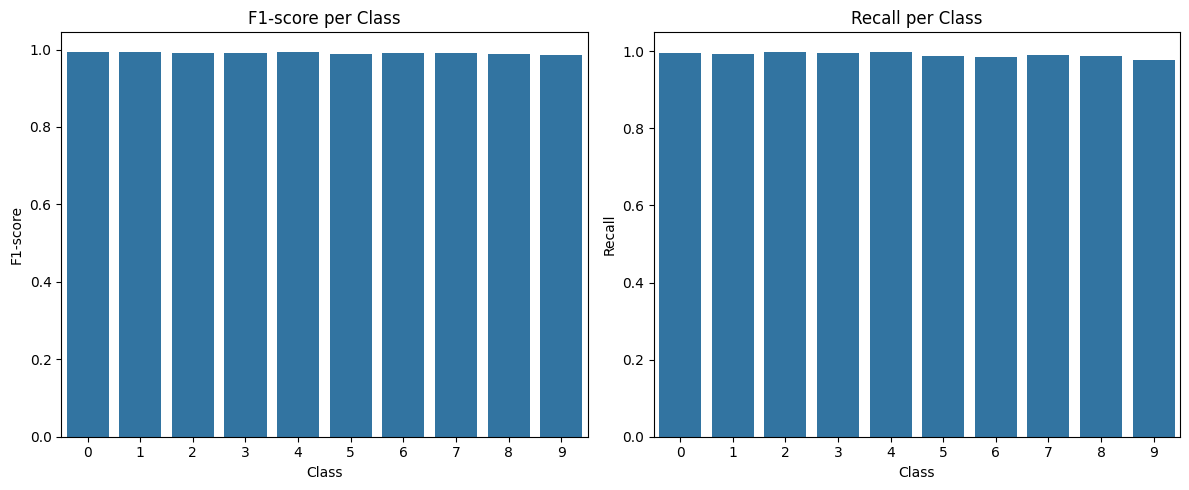

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Extract F1-score and Recall for each class
f1_scores = [report[str(i)]['f1-score'] for i in range(10)]
recalls = [report[str(i)]['recall'] for i in range(10)]

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(range(10)), y=f1_scores)
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score per Class')

plt.subplot(1, 2, 2)
sns.barplot(x=list(range(10)), y=recalls)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall per Class')

plt.tight_layout()
plt.show()


# 1.2 Regression Metrics

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Simulated true and predicted values
y_true = np.array([3.5, 2.8, 4.0, 5.2, 3.3])
y_pred = np.array([3.7, 2.9, 3.8, 5.1, 3.1])

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared: {r2:.2f}")

Mean Absolute Error: 0.16
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17
R-Squared: 0.96


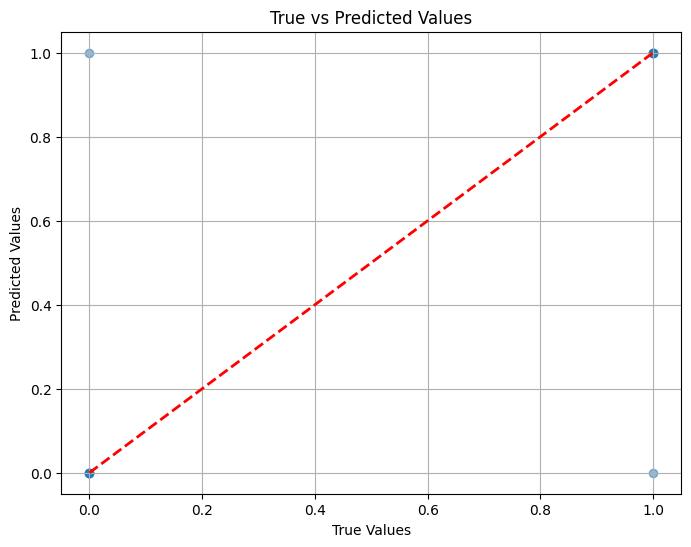

In [17]:
# prompt: plot above data in matplot

import matplotlib.pyplot as plt

# Assuming y_true and y_pred are already defined from your previous code
# Example (replace with your actual data):
y_true = data['y_true'].values
y_pred = data['y_pred'].values

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', linewidth=2)


plt.show()


Here's a description of the regression metrics provided:

* **Mean Absolute Error (MAE): 0.16**  MAE measures the average absolute difference between the predicted and actual values.  An MAE of 0.16 indicates that, on average, your predictions are off by 0.16 units.  It's easy to interpret, as it's in the same units as your target variable. Lower is better.

* **Mean Squared Error (MSE): 0.03** MSE measures the average squared difference between predicted and actual values. Squaring the errors penalizes larger errors more heavily than smaller ones.  An MSE of 0.03 suggests relatively small errors, but its value is not directly interpretable in the units of the target variable due to the squaring.  Lower is better.

* **Root Mean Squared Error (RMSE): 0.17** RMSE is the square root of the MSE.  This brings the error metric back to the original units of the target variable, making it more interpretable than MSE.  An RMSE of 0.17 means the average difference between your predictions and actual values is approximately 0.17 units.  Lower is better, and it's generally preferred over MSE because it's in the same units as the target variable.

* **R-squared (R²): 0.96** R² represents the proportion of the variance in the target variable that is predictable from the predictor variables.  A value of 0.96 indicates that 96% of the variability in your target variable is explained by your model.  This is a very high R², suggesting a good fit.  Higher is better, with a maximum value of 1.

**In summary:** Your model demonstrates excellent performance on this regression task.  The low MAE, MSE, and RMSE values show that your predictions are very close to the actual values. The high R² value further confirms the model's ability to capture the underlying patterns in the data.
